In [1]:
import nltk
import wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython import display
import time 
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

In [2]:
spark = SparkSession.builder.master("local[*]")\
                            .appName('WordCloud')\
                            .getOrCreate()

22/09/23 20:58:54 WARN Utils: Your hostname, gustavo-x40 resolves to a loopback address: 127.0.1.1; using 192.168.0.2 instead (on interface wlo1)
22/09/23 20:58:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/23 20:58:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/09/23 20:58:57 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
def trata_tweets(df):
    words = df.select(f.explode(f.split(f.lower('_c0'), ' ')).alias('word'))\
                      .withColumn('word', f.regexp_replace('word', r"http\S+", ''))\
                      .withColumn('word', f.regexp_replace('word', r"@\w+", ''))\
                      .withColumn('word', f.regexp_replace('word', "rt", ''))\
                      .na.replace("", None)\
                      .na.drop()
                      
    
    return words

In [4]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gustavo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stops = stopwords.words('portuguese')

In [6]:
# com o comando dessa célula, é possível inseriri 
# manuamente palavras que não devem ser consideradas
# stops.append()

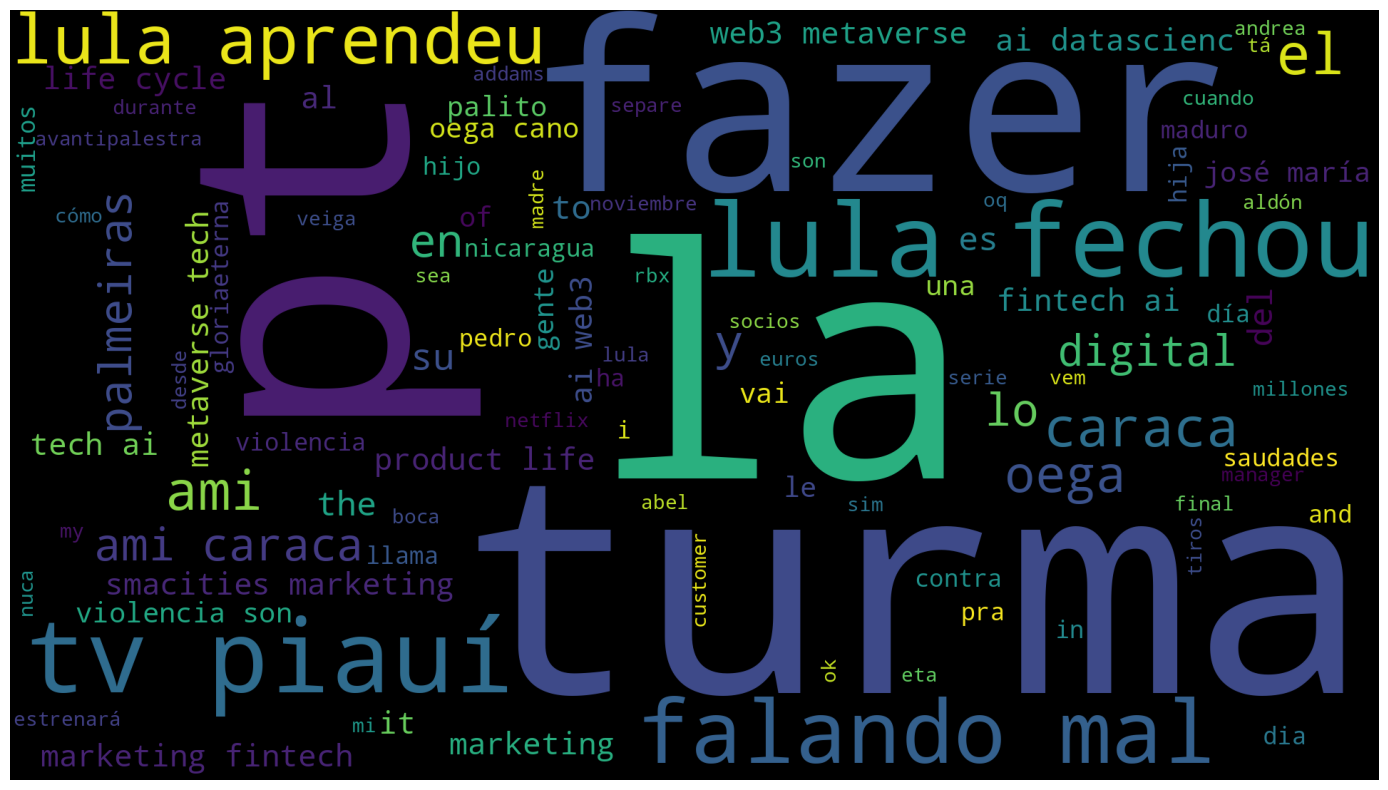

In [7]:
plt.figure(figsize=(20,10))

while True:
    try:
        words = spark.read.csv('./csv', encoding='utf-8')
        words = trata_tweets(words)
        rows = words.collect()
        all_words = ''
        
        for row in rows:
            all_words = all_words + ' ' + row['word']
            
        wordcloud = WordCloud(stopwords=stops,\
                              background_color='black',\
                              width=1920,\
                              height=1080,\
                              max_words=100).generate(all_words)
        
        # limpar os eixos dos gráficos
        plt.cla()
        plt.axis('off')
        plt.imshow(wordcloud)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(20)
        
        
    except KeyboardInterrupt:
        break